# What Will Be Prediction
### Using Naive Bayes/Random Forest

##### For now, this doesn't include occupation data, as we are still categorizing it

In [7]:
# Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
import sklearn.externals.six as sksix
import IPython.display as ipd
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import os

In [2]:
# Bring in data
bach = pd.read_csv('slim_set_bachelor.csv')

In [3]:
bach.dtypes

Unnamed: 0                     int64
SEASON                         int64
CONTESTANT                    object
CONTESTANT_JOB                object
CONTESTANT_HEIGHT            float64
HEIGHT_DIFF                  float64
HEIGHT_BIN                     int64
CONTESTANT_HOMETOWN_CITY      object
SAME_CITY                      int64
SAME_STATE                     int64
CONTESTANT_HOMETOWN_STATE     object
CONTESTANT_REGION             object
SAME_REGION                    int64
AGE_DIFF                     float64
AGE_DIFF_MEAN_POOL           float64
AGE_DIFF_BACH_POOL           float64
AGE_DIFF_CAT                   int64
CONTESTANT_ELIMWEEK          float64
WINNER                         int64
dtype: object

In [4]:
# split into train/test
print(bach.SEASON.unique())

[ 1  2  5  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [66]:
## seasons 1-18 to train, 19 and 20 to test (i think 21 has multiple winners?)
train_batch = [1, 2, 5, 9, 10, 11, 12, 13, 14, 15,16, 17, 18]
test_batch = [19, 20]
train_bach = bach[bach.SEASON.isin(train_batch)]
test_bach = bach[bach.SEASON.isin(test_batch)]

## Random Forest

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
train_bach.ix[:,[6, 8, 9, 12, 13, 14, 15, 16, 18]].head()

,HEIGHT_BIN,SAME_CITY,SAME_STATE,SAME_REGION,AGE_DIFF,AGE_DIFF_MEAN_POOL,AGE_DIFF_BACH_POOL,AGE_DIFF_CAT,WINNER
0,4,0,1,0,9.0,-3.4,5.6,2,1
1,4,0,1,1,3.0,2.6,5.6,2,0
2,4,0,1,1,8.0,-2.4,5.6,2,0
3,4,0,1,0,8.0,-2.4,5.6,2,0
4,4,0,1,0,10.0,-4.4,5.6,2,0


In [73]:
twc = train_bach.ix[:,[6, 8, 9, 12, 13, 14, 15, 16, 18]]
twc = twc.dropna()

In [75]:
# build a random forest
rf_model = skens.RandomForestClassifier(n_estimators=10,oob_score=True, criterion='entropy')
rf_model.fit(twc.ix[:, :8], twc.WINNER)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [76]:
predicted_labels = rf_model.predict(test_bach.ix[:,[6, 8, 9, 12, 13, 14, 15, 16]])
test_bach['PREDICTED'] = predicted_labels

In [77]:
test_bach.PREDICTED.value_counts()

0    58
Name: PREDICTED, dtype: int64

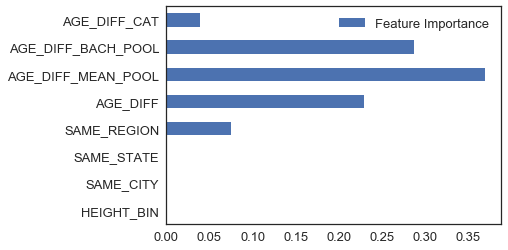

In [78]:
# Check feature importance
feat_importance = rf_model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=train_bach.columns[[6, 8, 9, 12, 13, 14, 15, 16]]).plot(kind='barh')